In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
train_data = datasets.MNIST(root = "./data", train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.31MB/s]


In [5]:
test_data = datasets.MNIST(root = './data', train=False, download=True, transform=transform)

In [6]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(train_data, batch_size=64, shuffle=False)

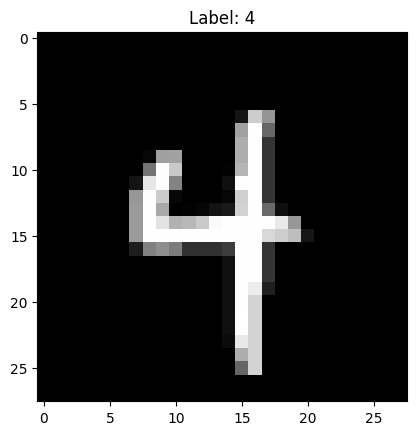

In [21]:
images, labels = next(iter(train_loader))
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()

In [22]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(16*14*14, 64)
    self.fc2 = nn.Linear(64,10)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = x.view(-1, 16*14*14)
    x = torch.relu(self.fc1(x))
    return self.fc2(x)

model = SimpleCNN().to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 3

In [26]:
for epoch in range(epochs):
  model.train()
  running_loss = 0.0

  for imgs, lbls in train_loader:
    imgs, lbls = imgs.to(device), lbls.to(device)

    optimizer.zero_grad()
    outputs = model(imgs)
    loss = criterion(outputs, lbls)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f"Epoch {epoch+1}/{epoch} - Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/0 - Loss: 0.2637
Epoch 2/1 - Loss: 0.0850
Epoch 3/2 - Loss: 0.0614


In [28]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
  for imgs, lbls in test_loader:
    imgs, lbls = imgs.to(device), lbls.to(device)
    outputs = model(imgs)
    _, predicted = torch.max(outputs, 1)
    total += lbls.size(0)
    correct += (predicted == lbls).sum().item()

print(f"Test Accuracy: {100*correct/total:.2f}%")

Test Accuracy: 98.26%


In [29]:
torch.save(model.state_dict(), "mnist_cnn.pth")

In [31]:
model2 = SimpleCNN().to(device)
model2.load_state_dict(torch.load("mnist_cnn.pth"))
print(model2.eval())
print("Lord, we've got out model loaded")

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)
Lord, we've got out model loaded
